# Import libraries and Load Data

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import missingno as msno
pd.set_option("display.max_columns",999)

In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [53]:
def load_data():
    path=str(os.getcwd())+"\data"
    df_list=[]
    
    for file_name in os.listdir(path):
        df=reduce_mem_usage(pd.read_csv(path+'\\'+file_name))
        df_list.append(df)
        
    return [df for df in df_list]

In [54]:
subm_df, test_df, train_labels_df, train_df=load_data()

Mem. usage decreased to  0.17 Mb (25.0% reduction)
Mem. usage decreased to  3.71 Mb (18.1% reduction)
Mem. usage decreased to  0.68 Mb (25.0% reduction)
Mem. usage decreased to 14.84 Mb (18.1% reduction)


# Explore the Data

## General information

In [5]:
for df_name, df in zip(["Submission File", "Test File","Train Label File","Train File"],[subm_df,test_df,train_labels_df,train_df]):
    print(df_name,"General Information-----------------------------------------------------------\n")
    df.info()
    print("\n")

Submission File General Information-----------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            14850 non-null  int32 
 1   status_group  14850 non-null  object
dtypes: int32(1), object(1)
memory usage: 174.1+ KB


Test File General Information-----------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int32  
 1   amount_tsh             14850 non-null  float32
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int16  
 5   instal

In [9]:
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [29]:
def explore_unique_values(series_name,series):
    if len(series.unique())>15:
        print("Sample of 15 of Unique Values for {}: \n\n {}\n\n".format(series_name,series.unique()[:15]))
    else:
        print("Unique Values for {}: \n\n {}\n\n".format(series_name,series.unique()))

In [32]:
[explore_unique_values(feature,train_df[feature]) for feature in train_df.columns]

Sample of 15 of Unique Values for id: 

 [69572  8776 34310 67743 19728  9944 19816 54551 53934 46144 49056 50409
 36957 50495 53752]


Sample of 15 of Unique Values for amount_tsh: 

 [6000.    0.   25.   20.  200.  500.   50. 4000. 1500.    6.  250.   10.
 1000.  100.   30.]


Sample of 15 of Unique Values for date_recorded: 

 ['2011-03-14' '2013-03-06' '2013-02-25' '2013-01-28' '2011-07-13'
 '2011-03-13' '2012-10-01' '2012-10-09' '2012-11-03' '2011-08-03'
 '2011-02-20' '2013-02-18' '2012-10-14' '2013-03-15' '2012-10-20']


Sample of 15 of Unique Values for funder: 

 ['Roman' 'Grumeti' 'Lottery Club' 'Unicef' 'Action In A'
 'Mkinga Distric Coun' 'Dwsp' 'Rwssp' 'Wateraid' 'Isingiro Ho' 'Private'
 'Danida' 'World Vision' 'Lawatefuka Water Supply' 'Biore']


Sample of 15 of Unique Values for gps_height: 

 [1390 1399  686  263    0   62 1062 1368 1645 1703 1656 1162 1763 2216
 1510]


Sample of 15 of Unique Values for installer: 

 ['Roman' 'GRUMETI' 'World vision' 'UNICEF' 'Artisan' 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [34]:
[explore_unique_values(feature,train_df[feature]) for feature in test_df.columns]

Sample of 15 of Unique Values for id: 

 [69572  8776 34310 67743 19728  9944 19816 54551 53934 46144 49056 50409
 36957 50495 53752]


Sample of 15 of Unique Values for amount_tsh: 

 [6000.    0.   25.   20.  200.  500.   50. 4000. 1500.    6.  250.   10.
 1000.  100.   30.]


Sample of 15 of Unique Values for date_recorded: 

 ['2011-03-14' '2013-03-06' '2013-02-25' '2013-01-28' '2011-07-13'
 '2011-03-13' '2012-10-01' '2012-10-09' '2012-11-03' '2011-08-03'
 '2011-02-20' '2013-02-18' '2012-10-14' '2013-03-15' '2012-10-20']


Sample of 15 of Unique Values for funder: 

 ['Roman' 'Grumeti' 'Lottery Club' 'Unicef' 'Action In A'
 'Mkinga Distric Coun' 'Dwsp' 'Rwssp' 'Wateraid' 'Isingiro Ho' 'Private'
 'Danida' 'World Vision' 'Lawatefuka Water Supply' 'Biore']


Sample of 15 of Unique Values for gps_height: 

 [1390 1399  686  263    0   62 1062 1368 1645 1703 1656 1162 1763 2216
 1510]


Sample of 15 of Unique Values for installer: 

 ['Roman' 'GRUMETI' 'World vision' 'UNICEF' 'Artisan' 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Missing Data

In [6]:
for df_name, df in zip(["Submission File", "Test File","Train Label File","Train File"],[subm_df,test_df,train_labels_df,train_df]):
    print(df_name,"Missing Data-----------------------------------------------------------")
    print("\nAbsolute\n")
    print(df.isnull().sum())
    print("\nRelative in %\n")
    print(df.isnull().sum()/df.shape[0]*100)
    print("\n")

Submission File Missing Data-----------------------------------------------------------

Absolute

id              0
status_group    0
dtype: int64

Relative in %

id              0.0
status_group    0.0
dtype: float64


Test File Missing Data-----------------------------------------------------------

Absolute

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    

<Figure size 1440x576 with 0 Axes>

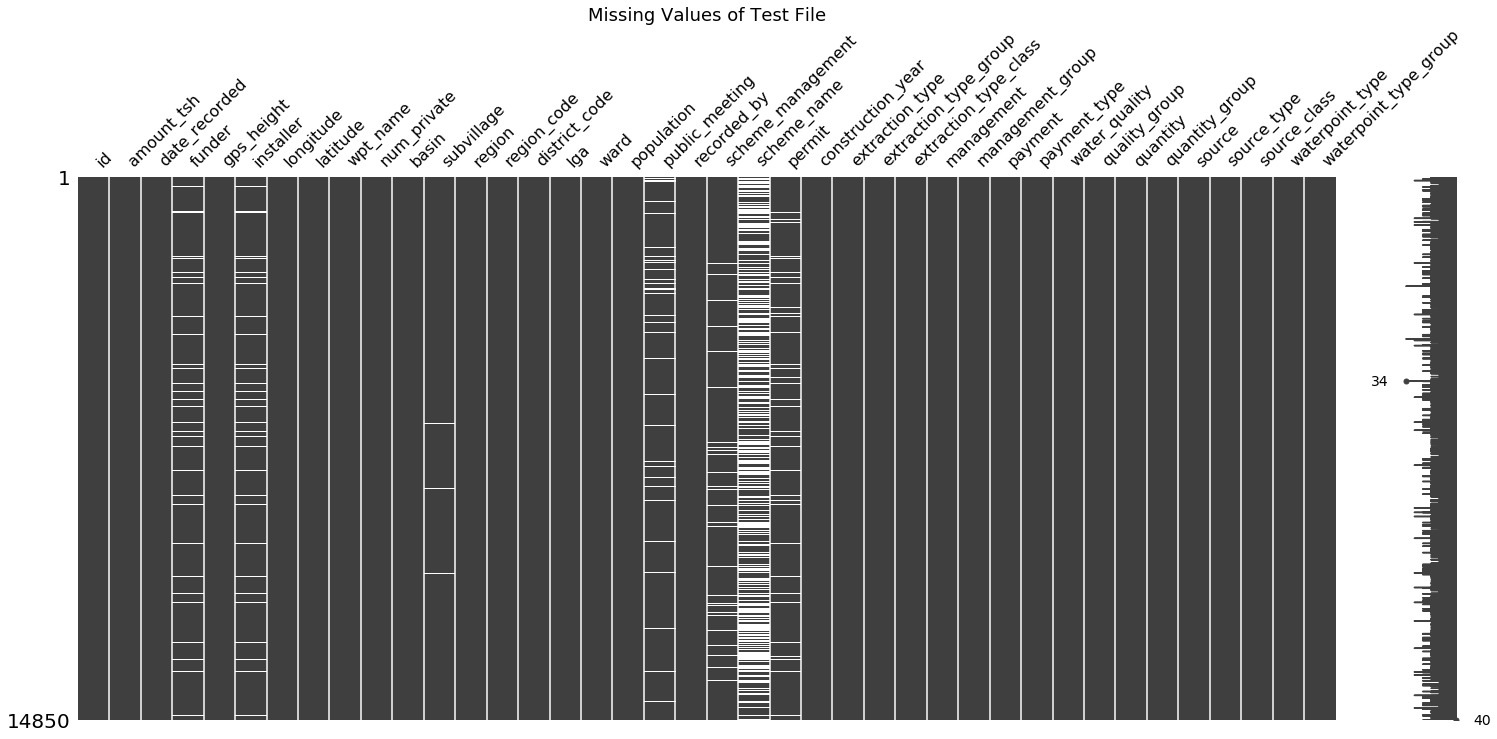

<Figure size 1440x576 with 0 Axes>

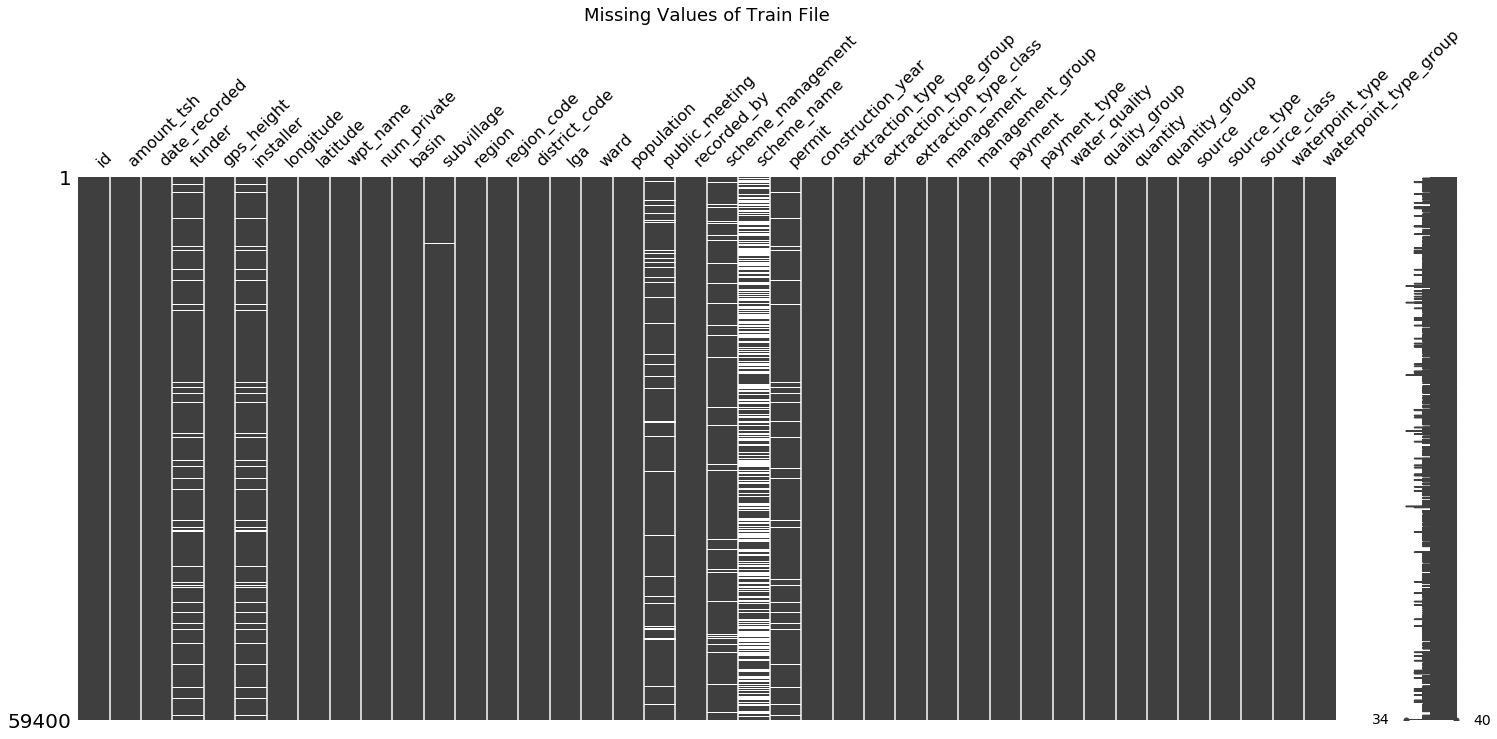

In [7]:
for df_name, df in zip(["Test File","Train File"],[test_df,train_df]):
    plt.figure(figsize=(20,8))
    msno.matrix(df)
    plt.title("Missing Values of {}".format(df_name),fontdict={"fontsize":18});

## Explore the Data

__Merge data__

In [55]:
train_df=pd.merge(train_df,train_labels_df,left_on="id",right_on="id",how="inner")
train_df.shape

(59400, 41)

__target Variable__

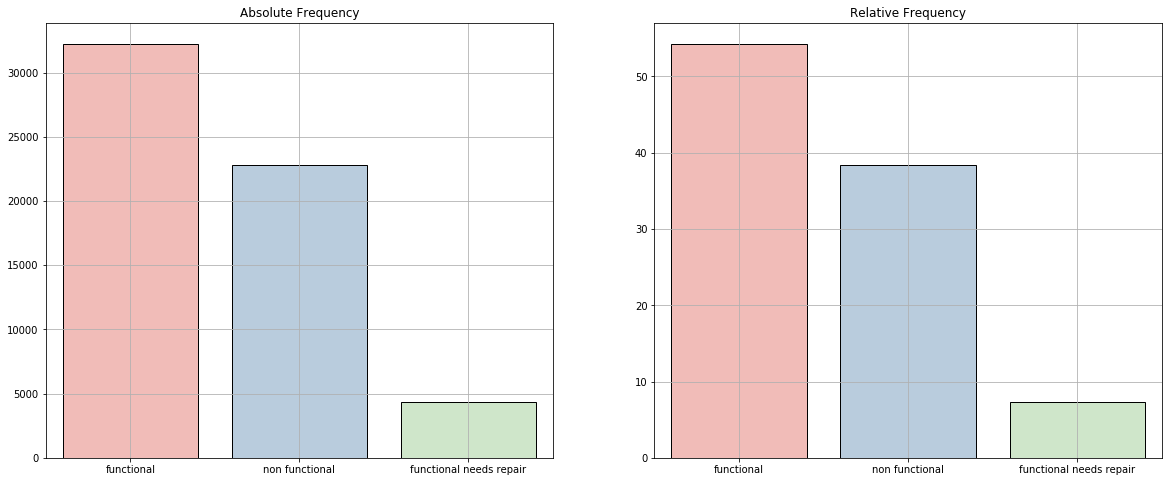

In [128]:
fig,(sub1,sub2)=plt.subplots(1,2,figsize=(20,8))
abs=train_df["status_group"].value_counts()
rel=train_df["status_group"].value_counts(normalize=True).mul(100)

sns.barplot(x=abs.index,y=abs.values,ax=sub1,edgecolor="black",palette="Pastel1")
sns.barplot(x=rel.index,y=rel.values,ax=sub2,edgecolor="black",palette="Pastel1")
sub1.grid(),sub2.grid()
sub1.set_title("Absolute Frequency"),sub2.set_title("Relative Frequency");

In [131]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
train_df["status_group"]=encoder.fit_transform(train_df["status_group"])

In [142]:
encoder.classes_

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

__Numerical Data__

In [56]:
train_df._get_numeric_data().columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [114]:
def plot_features(df,feature_list,cat):
    if cat:
        for feature in feature_list:
            if len(df[feature].unique())>20:
                abs_counts=df.groupby(feature)["status_group"].value_counts().head(20).rename("absolute Frequency").reset_index()
                rel_counts=df.groupby(feature)["status_group"].value_counts(normalize=True).mul(100).head(20).rename("relative Frequency").reset_index()
                fig,(sub1,sub2)=plt.subplots(1,2,figsize=(20,8))
                sns.barplot(x=feature,y="absolute Frequency",hue="status_group",data=abs_counts,ax=sub1,edgecolor="b")
                sns.barplot(x=feature,y="relative Frequency",hue="status_group",data=rel_counts,ax=sub2,edgecolor="b")
                sub1.grid(),sub2.grid()
                sub1.set_title("Absolute Frequency {}".format(feature)),sub2.set_title("Relative Frequency {}".format(feature))
                sub1.legend(loc='upper left'),sub2.legend(loc='upper left')
                sub2.set_ylabel("Relative Frequency in %")
            else:
                abs_counts=df.groupby(feature)["status_group"].value_counts().rename("absolute Frequency").reset_index()
                rel_counts=df.groupby(feature)["status_group"].value_counts(normalize=True).mul(100).rename("relative Frequency").reset_index()
                fig,(sub1,sub2)=plt.subplots(1,2,figsize=(20,8))
                sns.barplot(x=feature,y="absolute Frequency",hue="status_group",data=abs_counts,ax=sub1,edgecolor="b")
                sns.barplot(x=feature,y="relative Frequency",hue="status_group",data=rel_counts,ax=sub2,edgecolor="b")
                sub1.grid(),sub2.grid()
                sub1.set_title("Absolute Frequency {}".format(feature)),sub2.set_title("Relative Frequency {}".format(feature))
                sub1.legend(loc='upper left'),sub2.legend(loc='upper left')
                sub2.set_ylabel("Relative Frequency in %")
    else:
        df0=df[df["status_group"]==0]
        df1=df[df["status_group"]==1]
        df2=df[df["status_group"]==2]
        for feature in feature_list:
            fig,(sub1,sub2)=plt.subplots(1,2,figsize=(20,8))
            log_vals0=np.log1p(df0[feature])
            log_vals1=np.log1p(df1[feature])
            log_vals2=np.log1p(df2[feature])

            sns.distplot(a=df0[feature],ax=sub1,hist_kws={"edgecolor":"black"},kde=False,label="functional")
            sns.distplot(a=df1[feature],ax=sub1,hist_kws={"edgecolor":"black"},kde=False,label="non functional")
            sns.distplot(a=df2[feature],ax=sub1,hist_kws={"edgecolor":"black"},kde=False,label="functional needs repair")

            sns.distplot(a=log_vals0,ax=sub2,hist_kws={"edgecolor":"black"},kde=False,label="functional")
            sns.distplot(a=log_vals1,ax=sub2,hist_kws={"edgecolor":"black"},kde=False,label="non functional")
            sns.distplot(a=log_vals2,ax=sub2,hist_kws={"edgecolor":"black"},kde=False,label="functional needs repair")
            
            sub1.grid(),sub2.grid()
            sub1.set_title("Absolute Frequency {}".format(feature)),sub2.set_title("Natural Log of {}".format(feature))
            sub1.legend(loc="upper left"),sub2.legend(loc="upper left")

__Features in Trainset: Amount_tsh, Population__

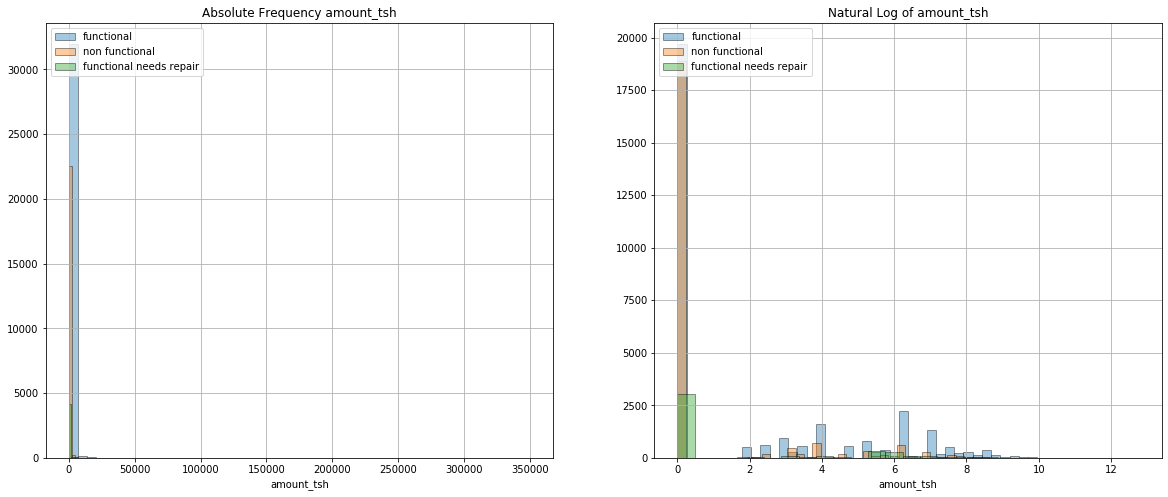

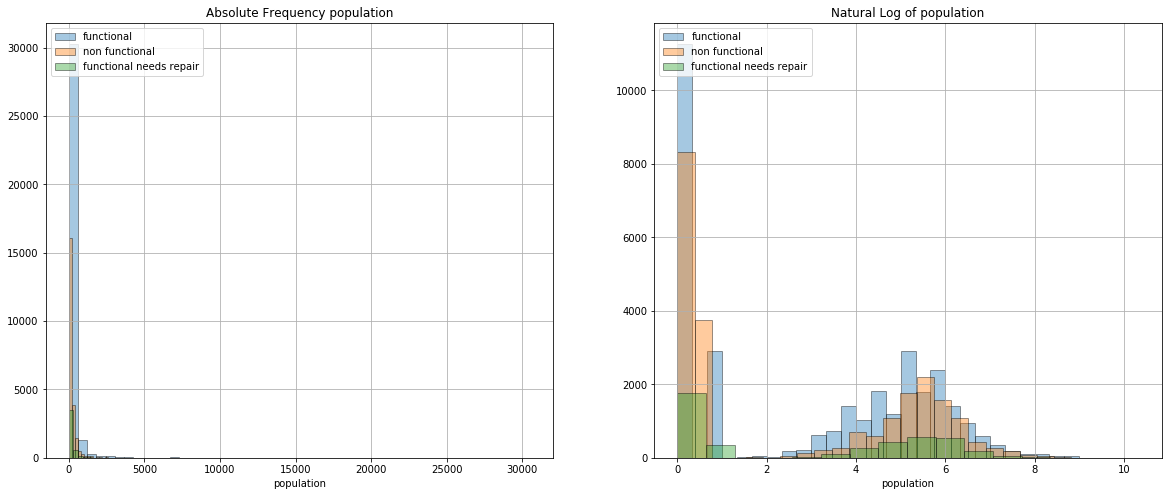

In [115]:
plot_features(train_df,["amount_tsh","population"],False)

__Features: 'num_private', 'region_code', 'district_code'__

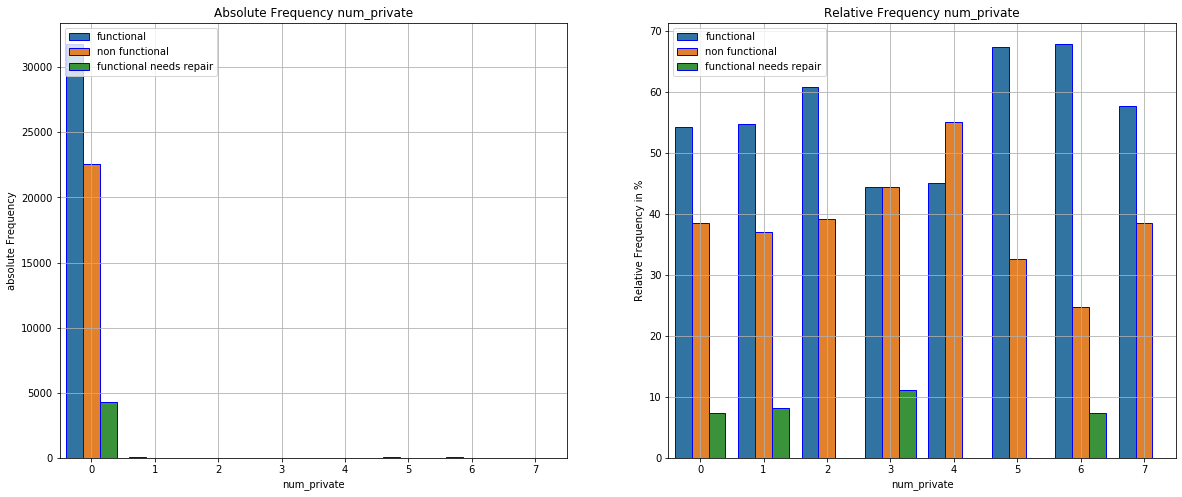

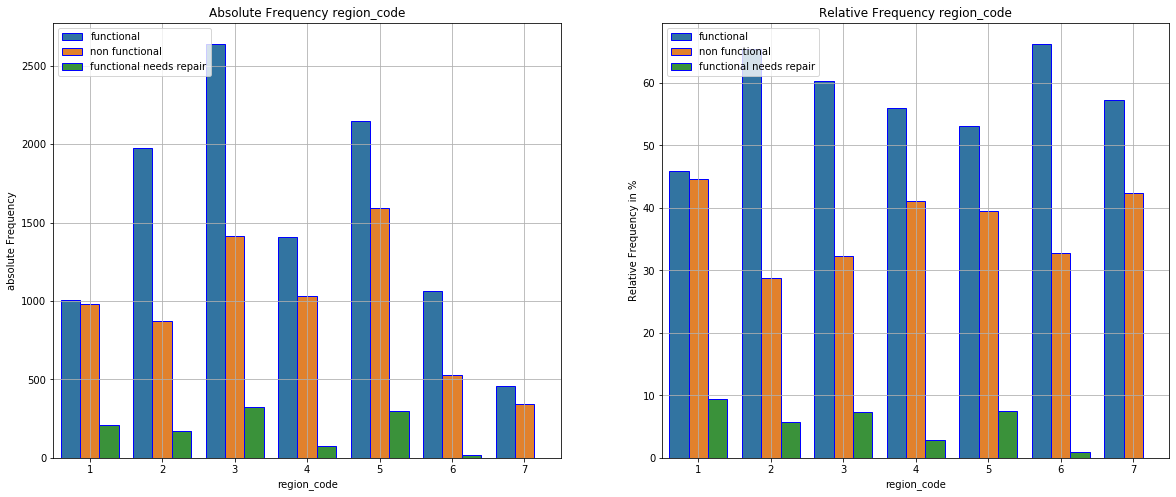

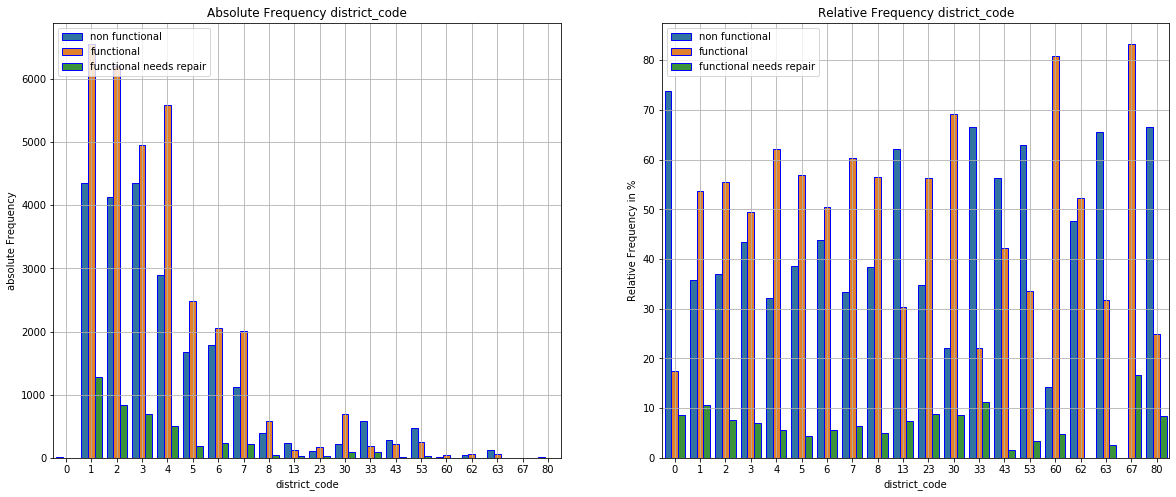

In [117]:
plot_features(train_df,['num_private', 'region_code', 'district_code'],True)

## Construction year

In [120]:
train_df._get_numeric_data()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.93750,-9.859375,0,11,5,109,1999
1,8776,0.0,1399,34.68750,-2.148438,0,20,2,280,2010
2,34310,25.0,686,37.46875,-3.822266,0,21,4,250,2009
3,67743,0.0,263,38.50000,-11.156250,0,90,63,58,1986
4,19728,0.0,0,31.12500,-1.825195,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.15625,-3.253906,0,3,5,125,1999
59396,27263,4700.0,1212,35.25000,-9.070312,0,11,4,56,1996
59397,37057,0.0,0,34.03125,-8.750000,0,12,7,0,0
59398,31282,0.0,0,35.87500,-6.378906,0,1,4,0,0


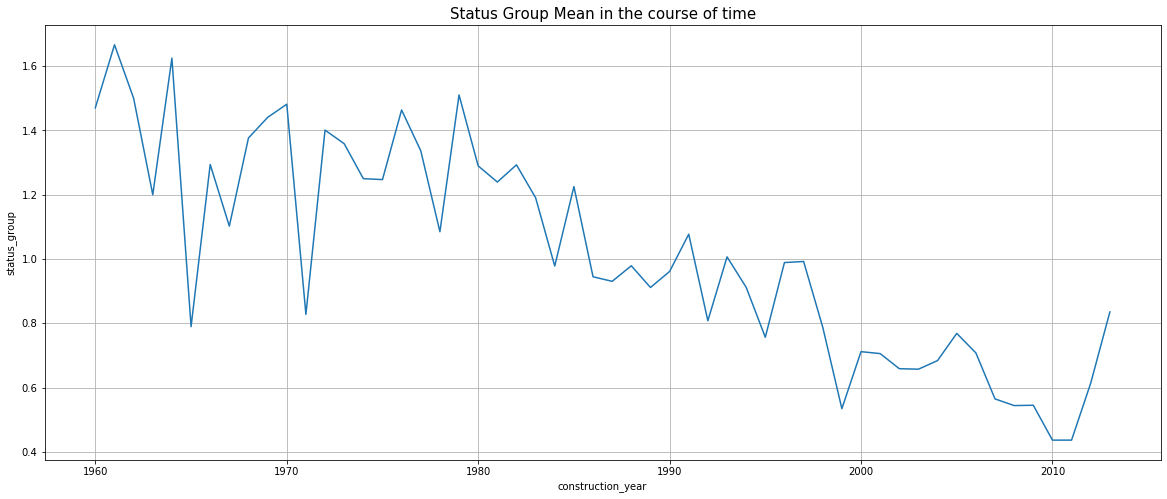

In [159]:
fig,sub=plt.subplots(1,1,figsize=(20,8))

sns.lineplot(x=pd.to_datetime(train_df.groupby("construction_year")["status_group"].mean().index[1:],format="%Y"),y=train_df.groupby("construction_year")["status_group"].mean()[1:],ax=sub)
sub.grid()
sub.set_title("Status Group Mean in the course of time",fontdict={"fontsize":15});

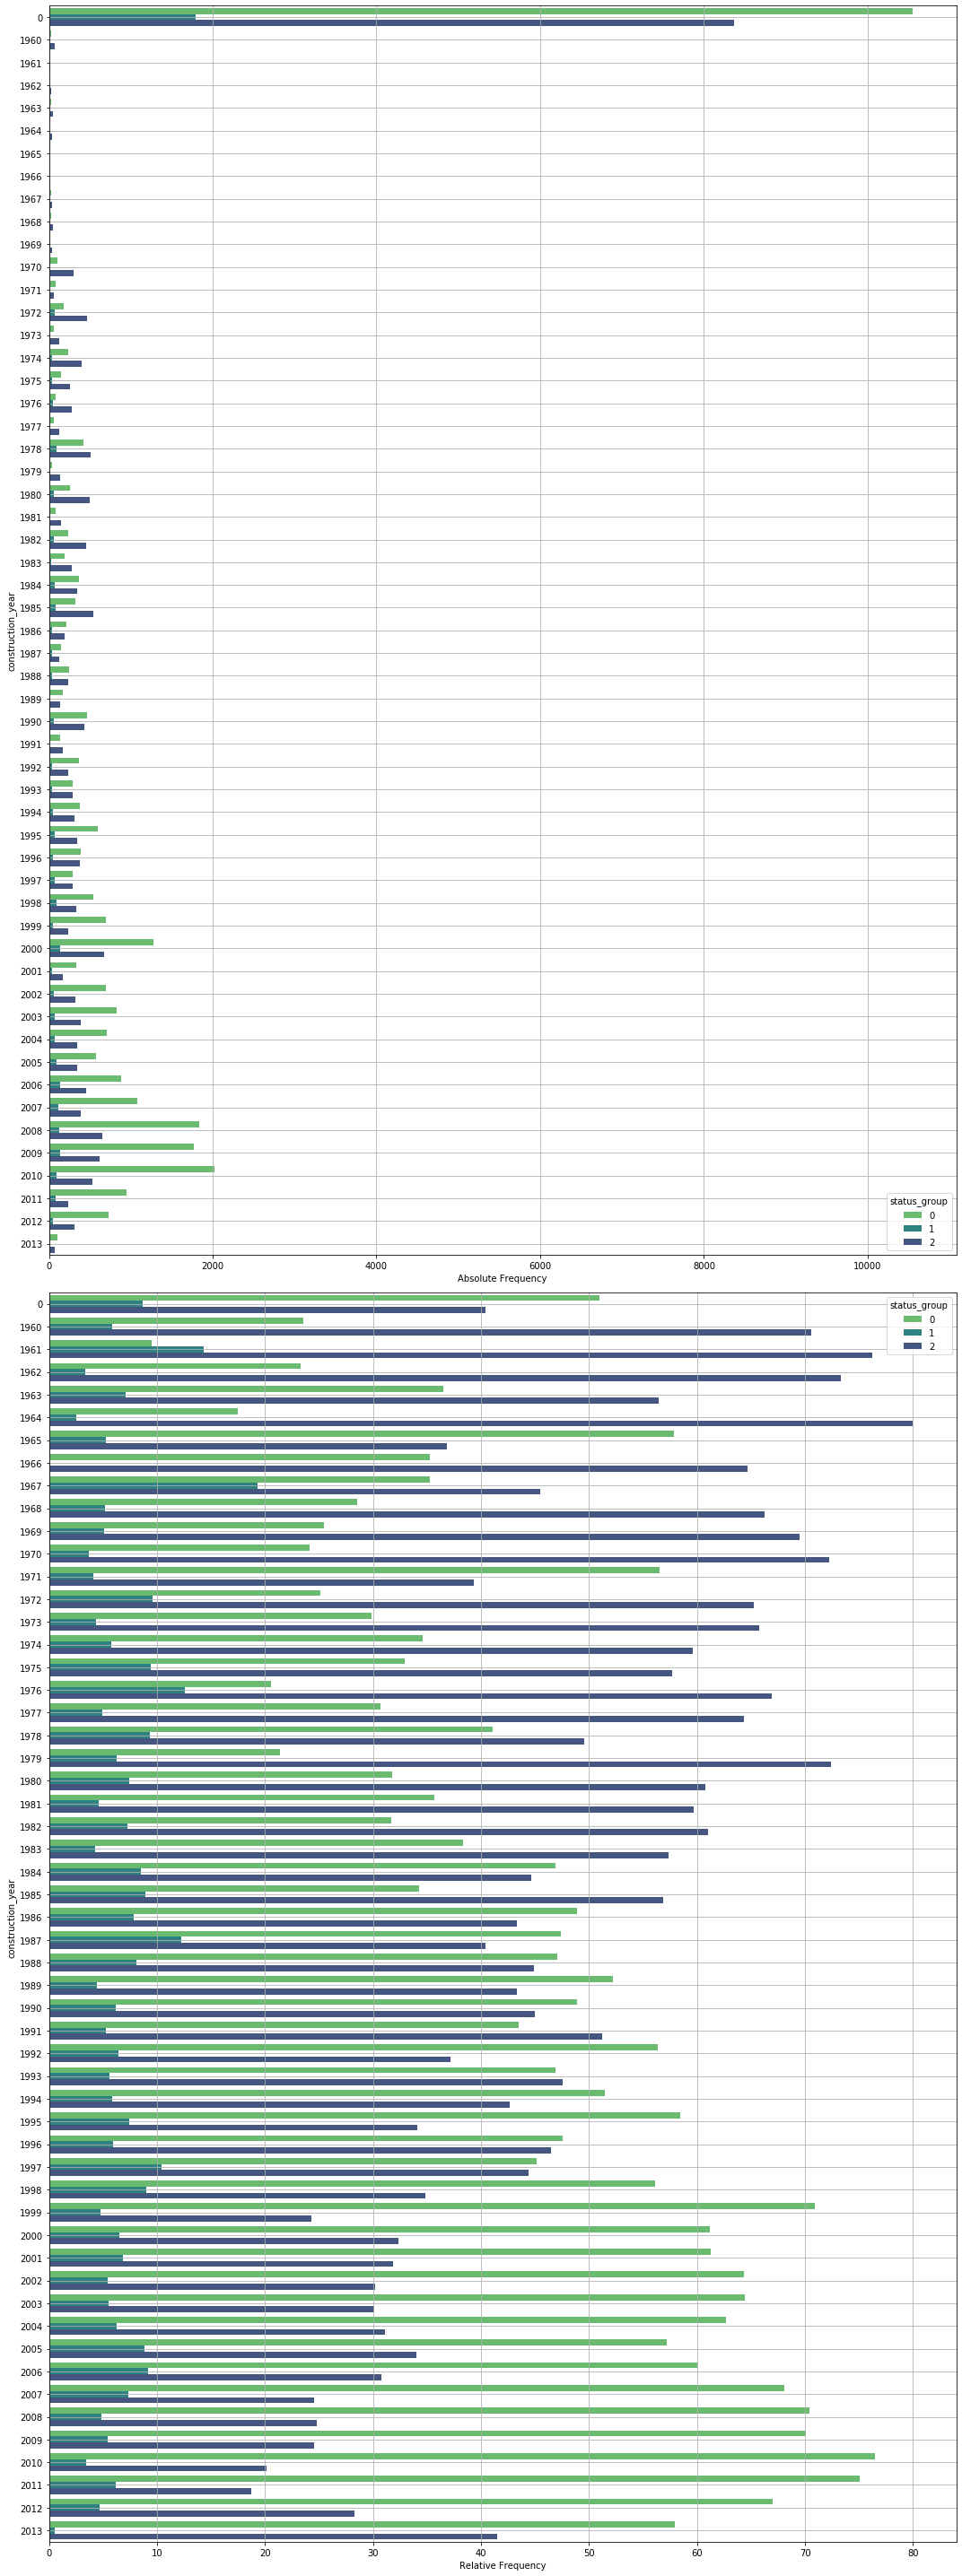

In [171]:

abs=train_df.groupby("construction_year")["status_group"].value_counts().rename("Absolute Frequency").reset_index()
rel=train_df.groupby("construction_year")["status_group"].value_counts(normalize=True).mul(100).rename("Relative Frequency").reset_index()

fig,(sub1,sub2)=plt.subplots(2,1,figsize=(15,40))

sns.barplot(y="construction_year",x="Absolute Frequency",hue="status_group",data=abs,ax=sub1,orient="horizontal",palette="viridis_r")
sns.barplot(y="construction_year",x="Relative Frequency",hue="status_group",data=rel,ax=sub2,orient="horizontal",palette="viridis_r")

sub1.grid(),sub2.grid()
fig.tight_layout();